In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')
df.shape

(3554, 18)

In [5]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2706,flat,elan mercado,sector 80,0.85,12409.0,1,1,1,15.0,Relatively New,761.0,0,0,0,0,0,0,60
1723,flat,ss the leaf,sector 85,1.93,8075.0,3,4,3,7.0,Relatively New,2400.0,0,1,0,0,0,0,174
2966,house,independent,sector 24,1.45,2984.0,3,3,1,2.0,Old Property,540.0,0,0,0,0,0,0,9
271,flat,pareena coban residences,sector 99,1.30,6510.0,3,3,0,16.0,New Property,1997.0,0,0,0,0,0,0,0
611,flat,central park flower valley aqua front towers,sector 33,2.10,11738.0,3,3,2,6.0,Under Construction,1619.0,0,0,0,0,0,0,24


We are not going to ask society as an input for predictive modeling. Same for price_per_sqft

In [6]:
train_df = df.drop(columns=['society', 'price_per_sqft'])
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 36,0.82,3,2,2,2.0,New Property,850.0,0,0,0,0,0,0,8
1,flat,sector 89,0.95,2,2,2,4.0,New Property,1226.0,1,1,0,0,0,0,38
2,flat,sohna road,0.32,2,2,1,17.0,New Property,1000.0,0,0,0,0,0,0,49
3,flat,sector 92,1.60,3,4,3+,10.0,Relatively New,1615.0,0,1,0,0,1,1,174
4,flat,sector 102,0.48,2,2,1,5.0,Relatively New,582.0,0,0,1,0,0,0,159


<Axes: >

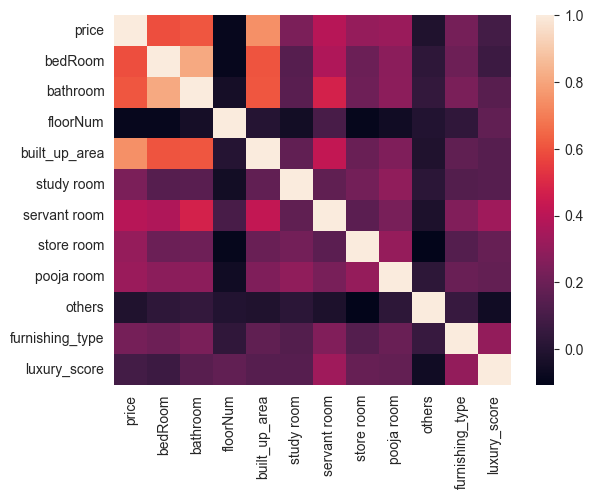

In [8]:
sns.heatmap(train_df.corr(numeric_only=True))

In [12]:
print(train_df.corr(numeric_only=True)['price'].sort_values(ascending=False))

price              1.000000
built_up_area      0.748574
bathroom           0.609777
bedRoom            0.591289
servant room       0.391930
pooja room         0.319852
store room         0.305677
study room         0.242955
furnishing_type    0.225625
luxury_score       0.091473
others            -0.013064
floorNum          -0.087442
Name: price, dtype: float64


In [13]:
# Cols in question

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession